___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

## Random Forest Classifier and Regressor

### Ensemble Learning

- Ensemble learning is a machine learning paradigm where multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem.
- Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

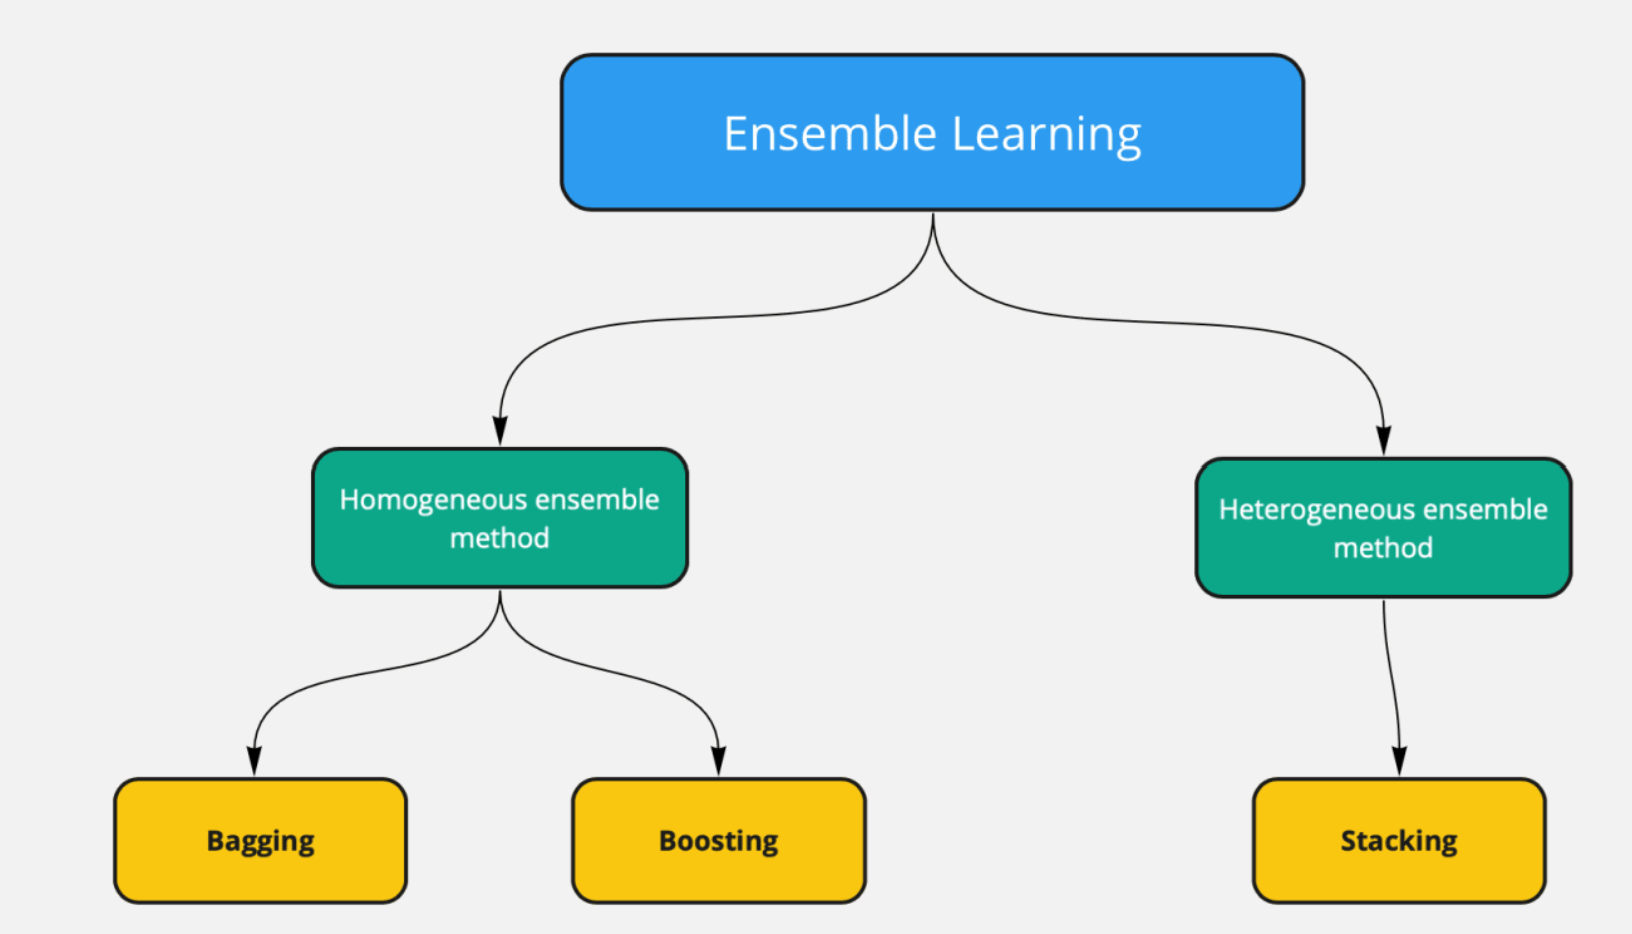



#### Bagging
- Bagging is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.

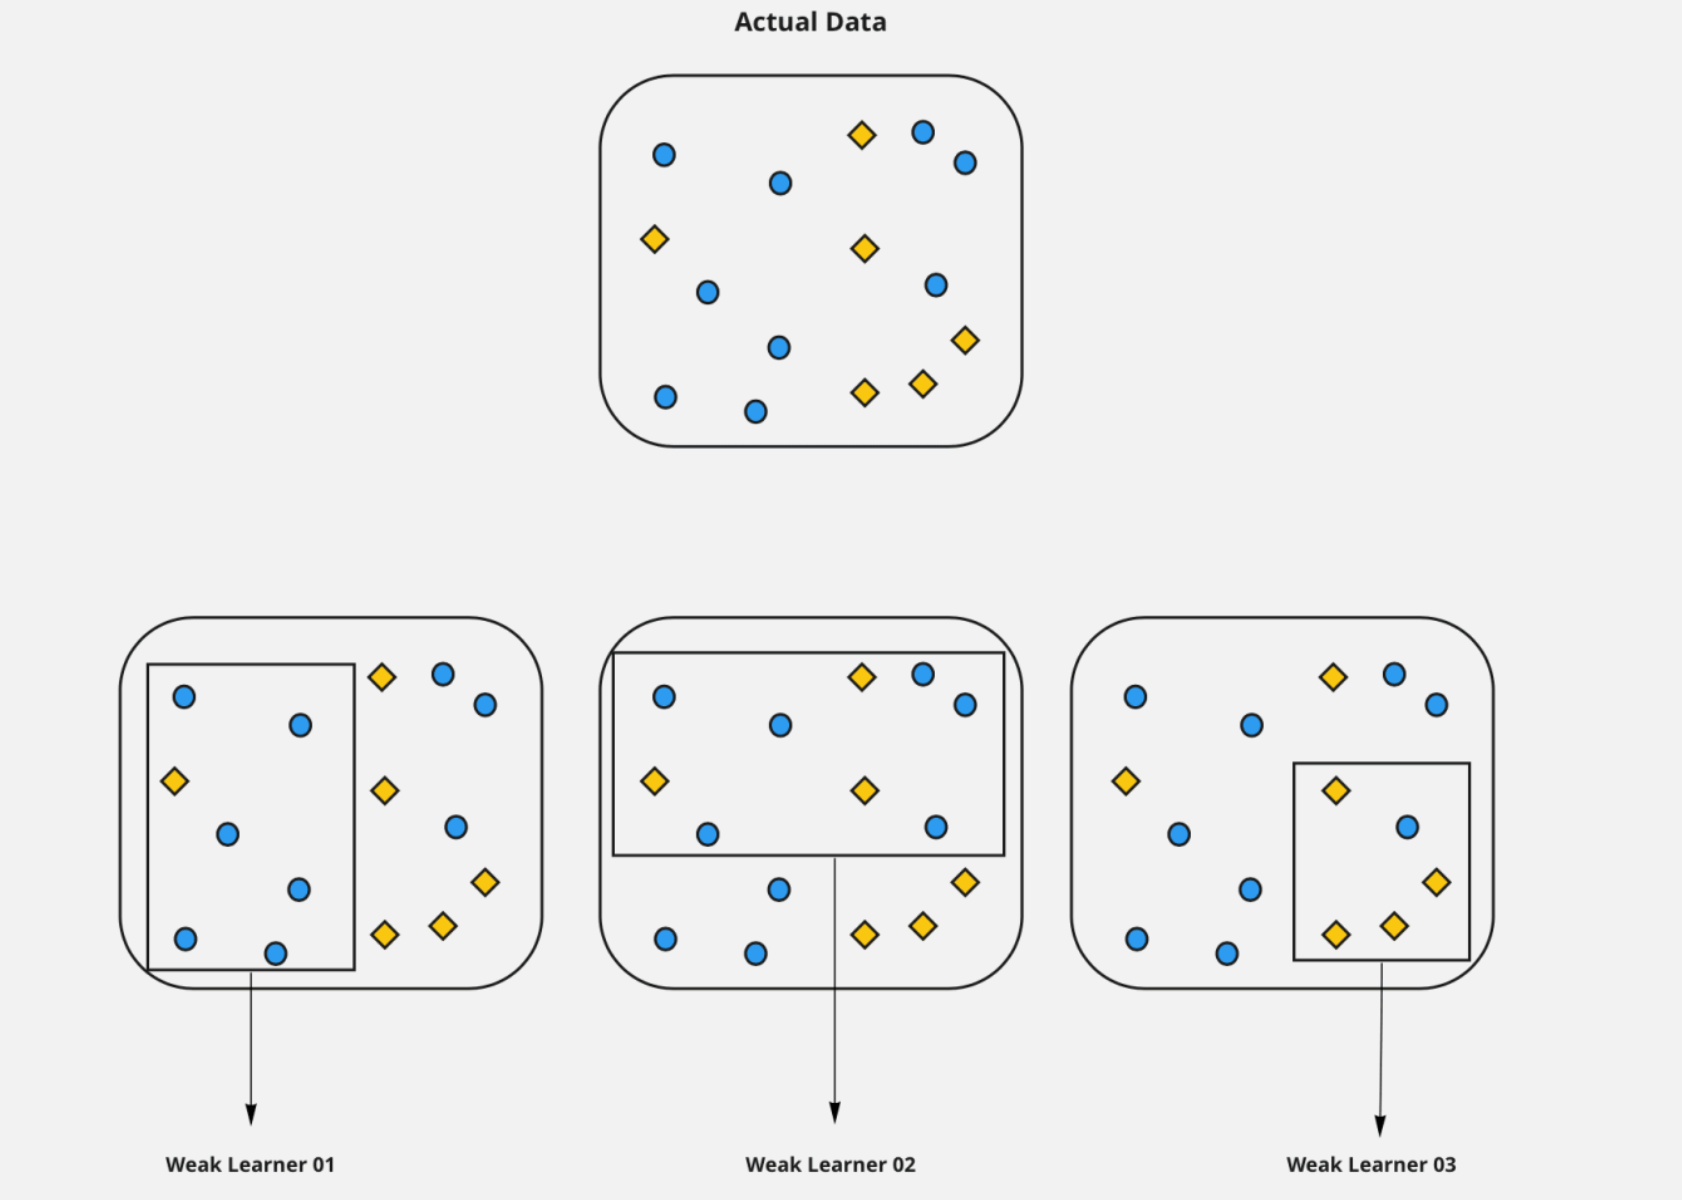

Bagging algorithms are typically used with decision trees as the base learners. The general procedure of bagging is as follows:
- A subset of training set is selected randomly. Same algorithm is used to build multiple trees.
- Each tree gives a class prediction and the class with the most votes becomes our model’s prediction.
- The final prediction is the average of all the predictions made by the individual trees.

Examples of bagging algorithms are Bagged Decision Trees, Random Forest, Extra Trees, etc.




#### Boosting
Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones. Boosting is a general ensemble method that can be used to improve the performance of any machine learning algorithm.

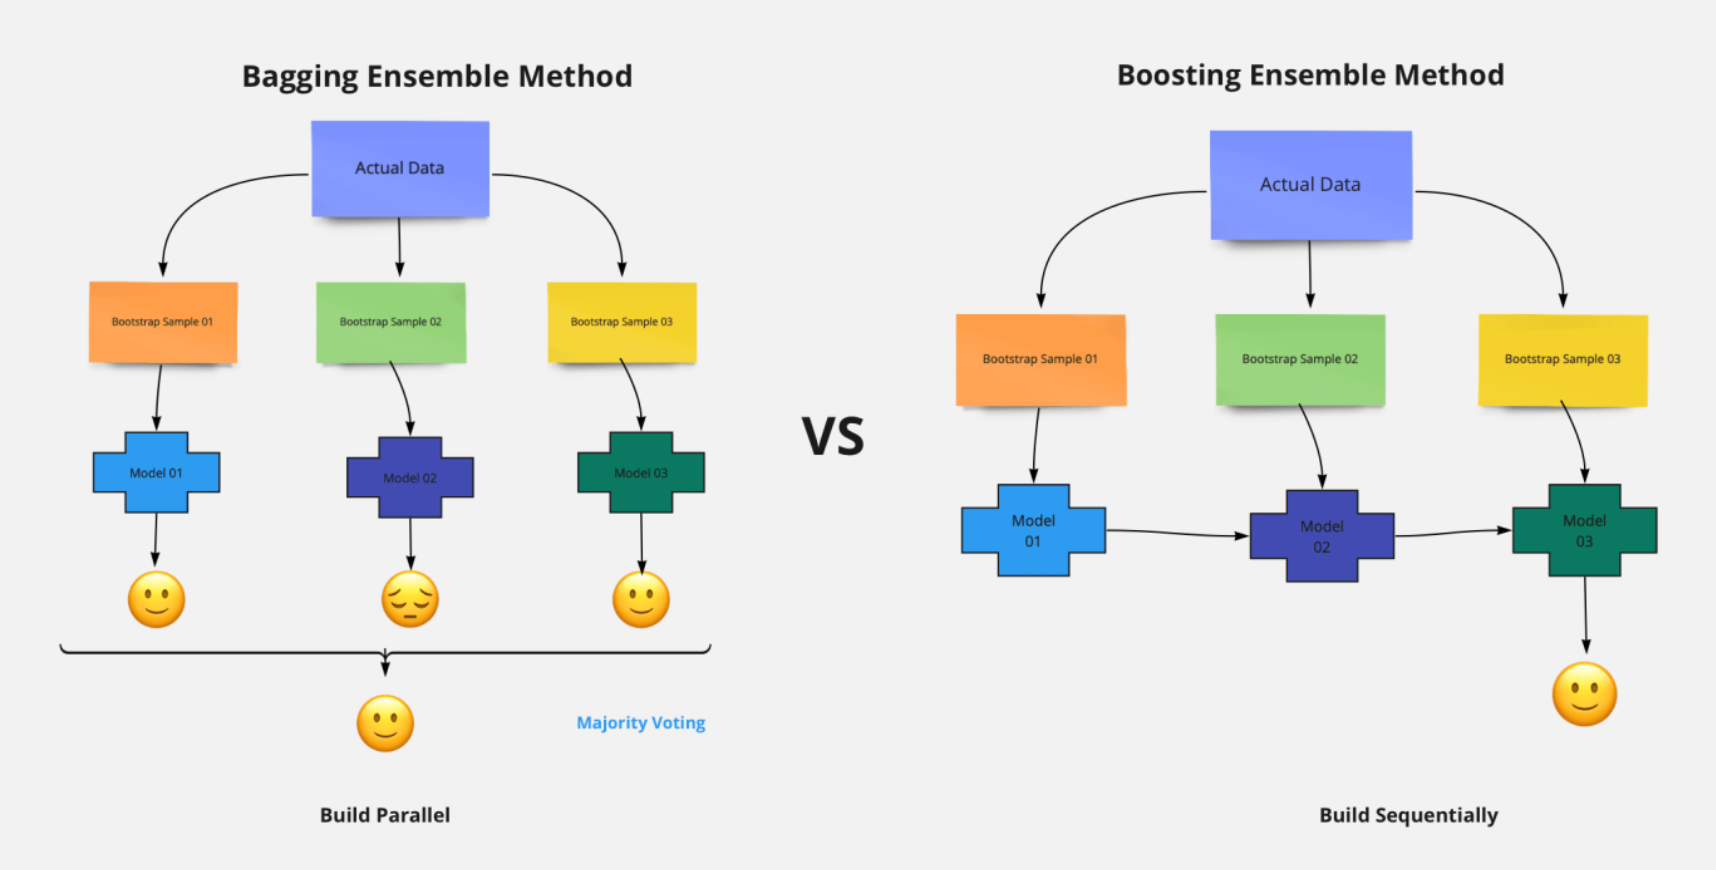

Examples of boosting algorithms are AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost, etc.

### Random Forest

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

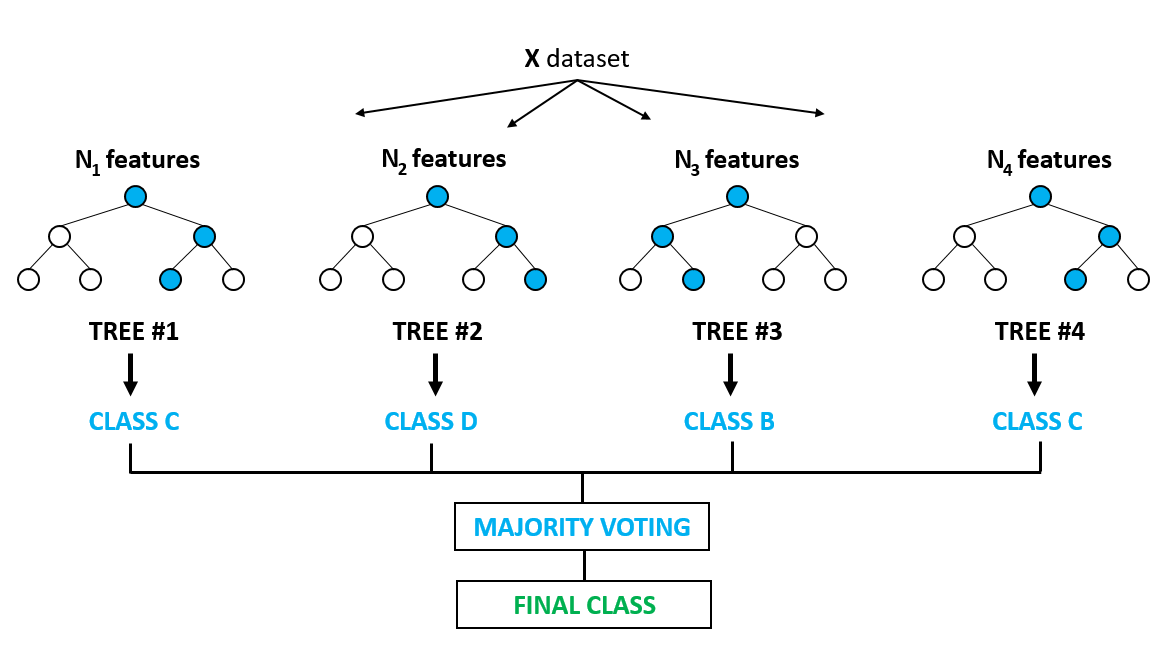

#### How the Random Forest Algorithm Works
- Random forests is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.
- It combines multiple decision trees in determining the final output rather than relying on individual decision trees.
- It creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
- The main idea behind this is that a combination of weak learners (decision trees) can result in a powerful ensemble model.


#### Random Forests vs Decision Trees 

- Random forests is a set of multiple decision trees.
- Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
- Decision trees are computationally faster.
- Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

### Dataset Introduction

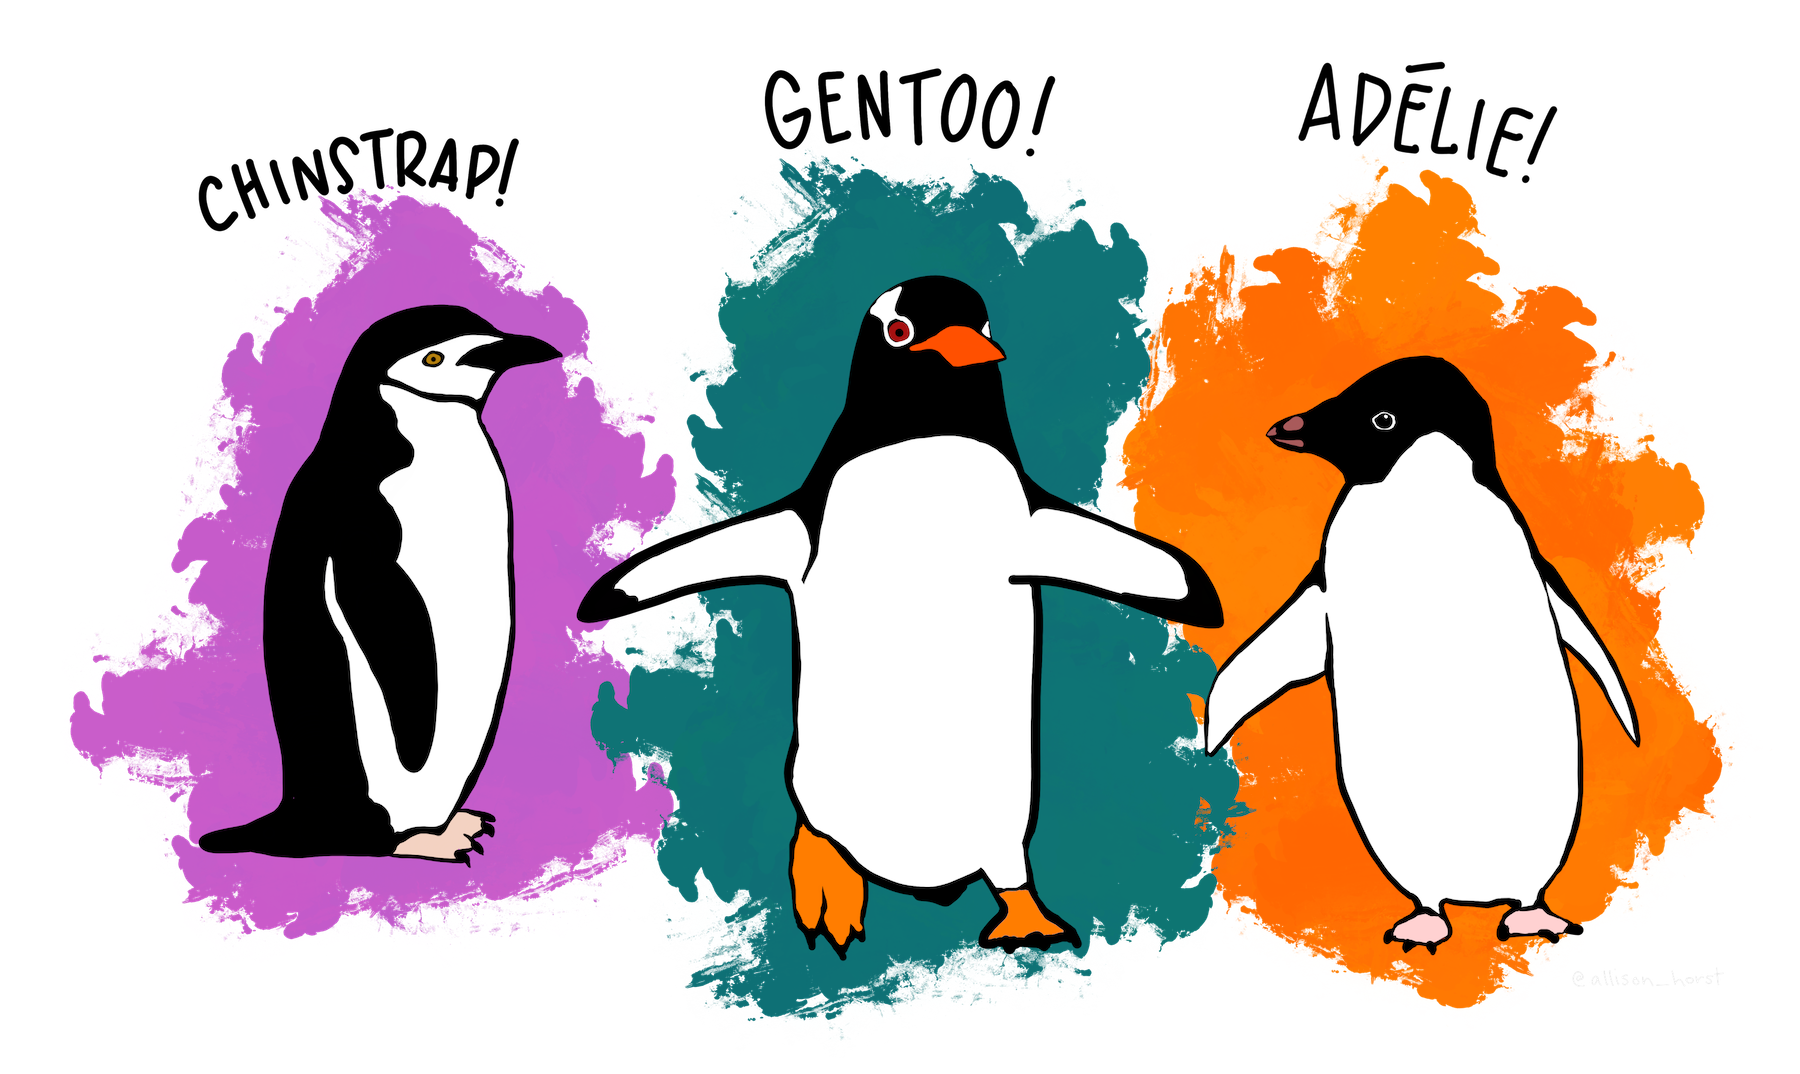

- We will use the `Palmer Penguins` dataset
- The dataset contains 3 species of penguins (Adelie, Chinstrap, and Gentoo) with the following 6 features:
    - `Species`: The species of the penguin (Adelie, Chinstrap, or Gentoo)
    - `Culmen Length (mm)`: The length of the upper ridge of the penguin's beak (mm)
    - `Culmen Depth (mm)`: The depth of the upper ridge of the penguin's beak (mm)
    - `Flipper Length (mm)`: The length of the penguin's flipper (mm)
    - `Body Mass (g)`: The body mass of the penguin (g)
    - `Sex`: The gender
    - `Island`: The island in which the penguin was spotted (Dream, Torgersen, or Biscoe)

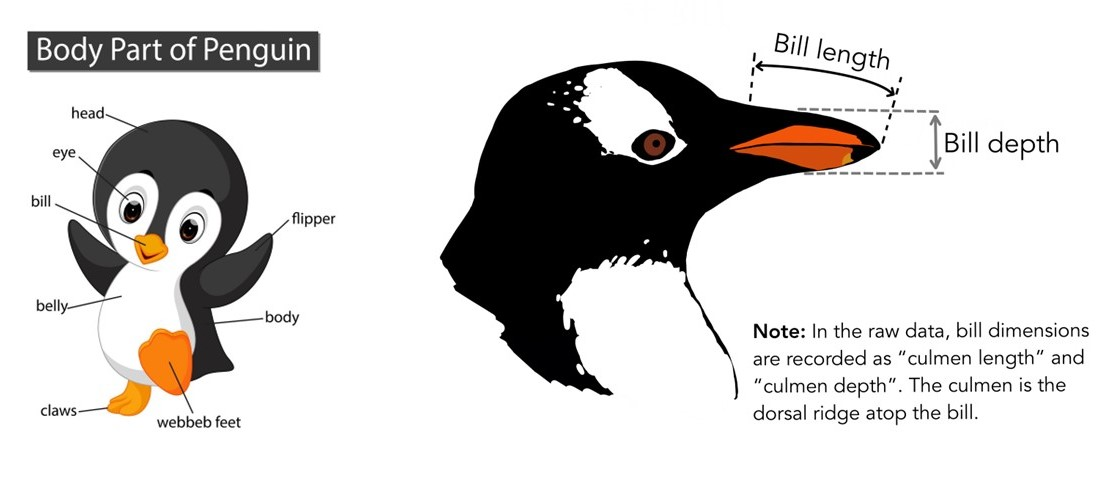

### Dataset Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/penguins_size.csv')
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

### Data Visualization

In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


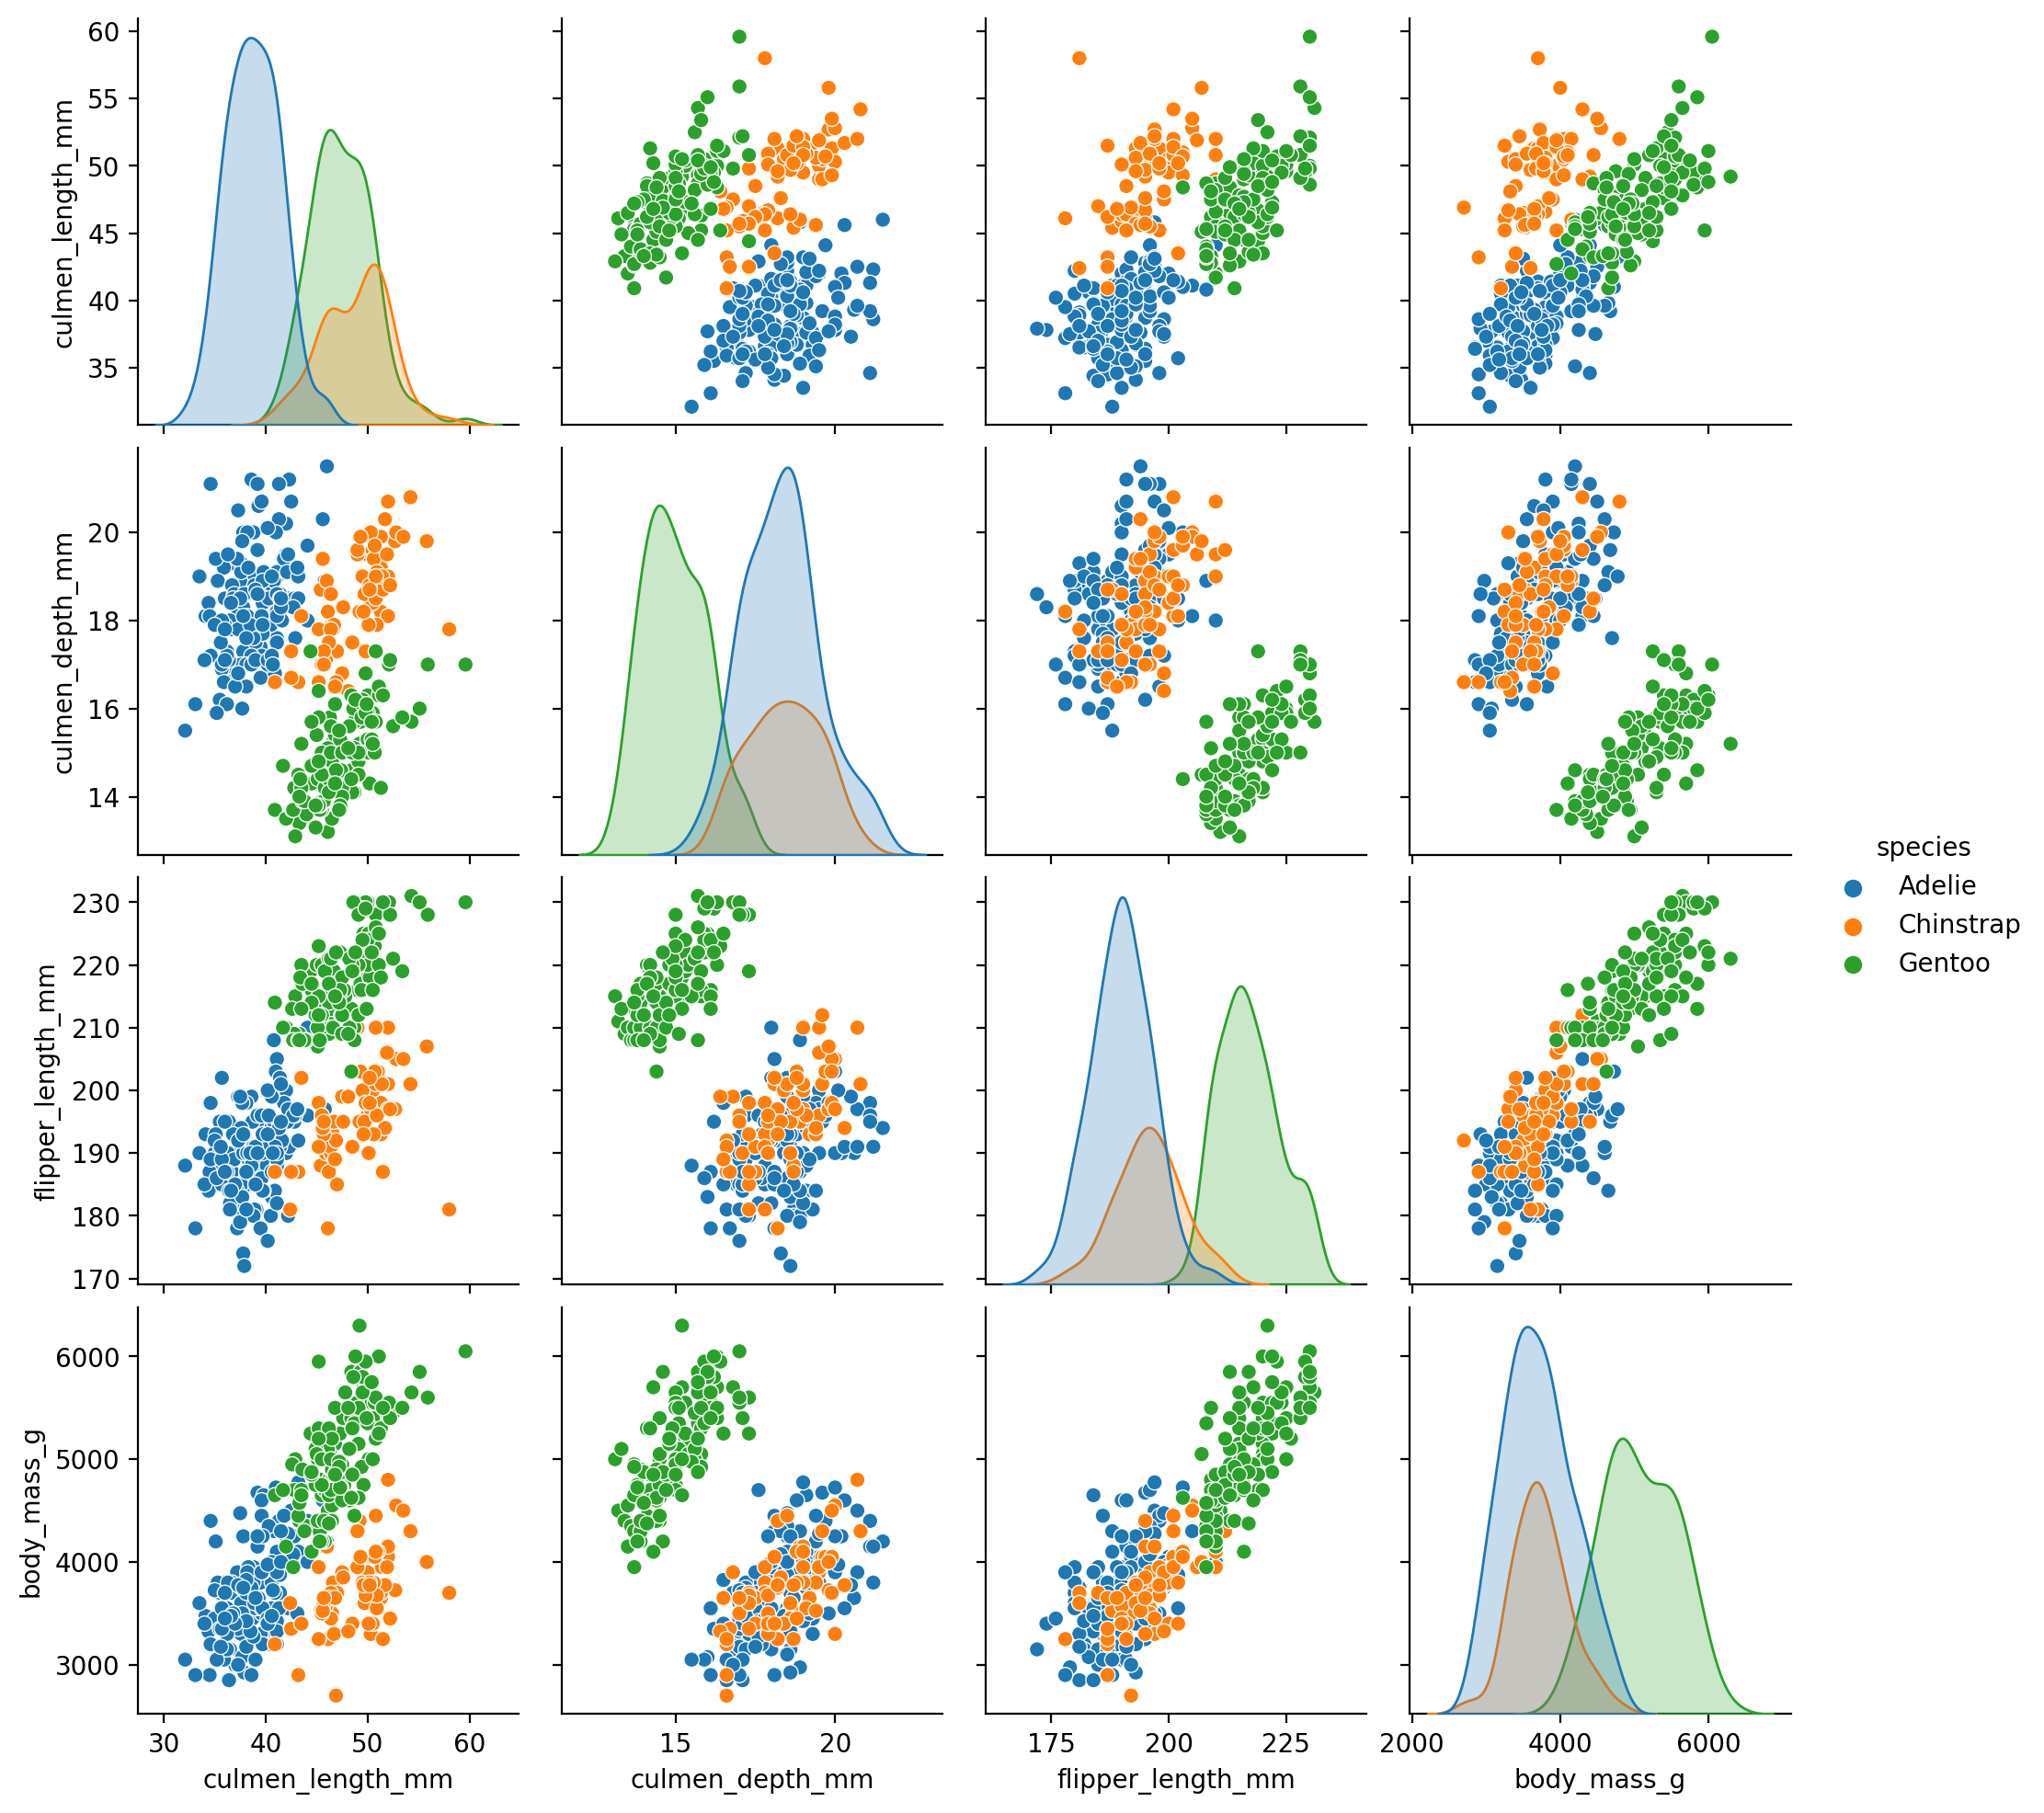

In [6]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 200

sns.pairplot(df, hue='species')

In [7]:
df.isnull().sum()
df.groupby(['species'])['sex'].value_counts()

df.dropna(inplace=True)
df.drop(df[df['sex']=='.'].index, inplace=True)

In [8]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<AxesSubplot:xlabel='species', ylabel='culmen_length_mm'>

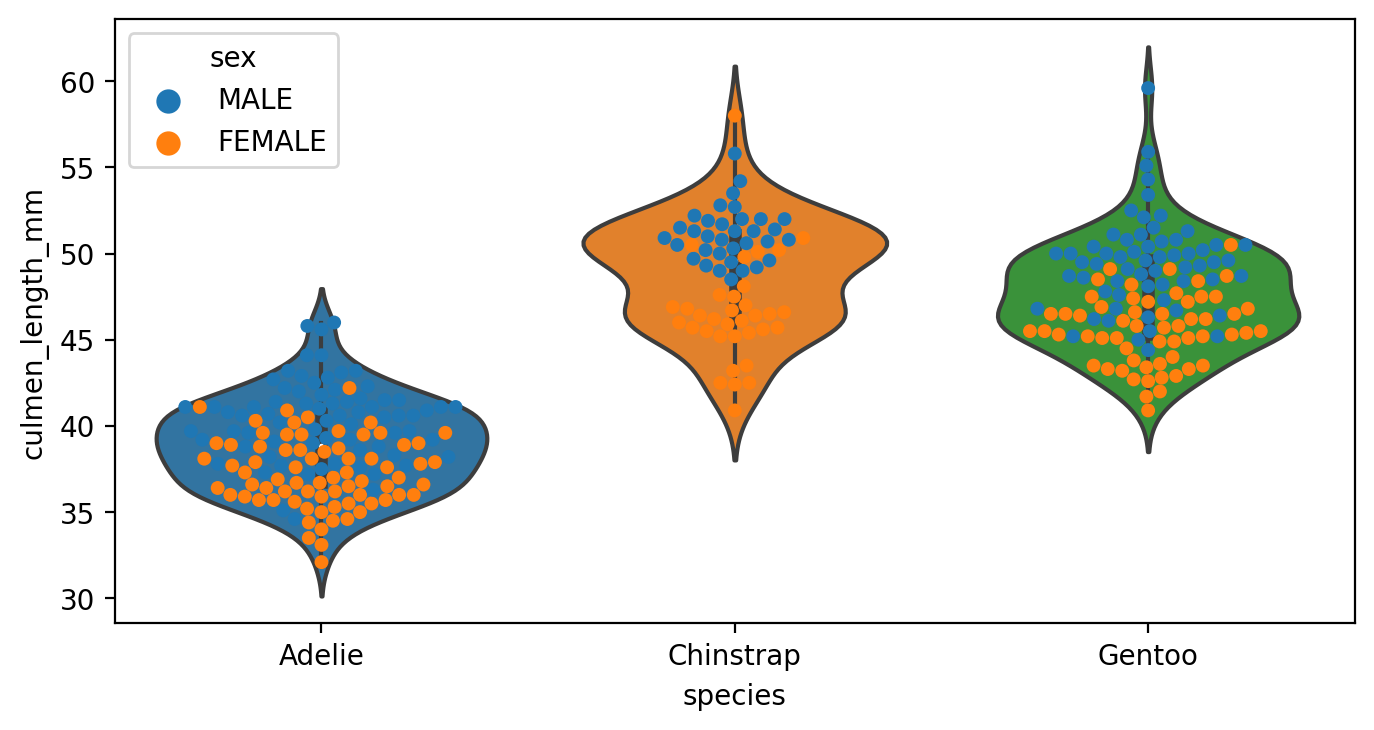

In [9]:
plt.figure(figsize=(8, 4), dpi=200)
# sns.violinplot(data=df, x='species', y='culmen_length_mm', hue='sex')
sns.violinplot(data=df, x='species', y='culmen_length_mm')
sns.swarmplot(data=df, x='species', y='culmen_length_mm', hue='sex')

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('species', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['species']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.shape, X_test.shape

((233, 7), (100, 7))

### Model Building and Evaluation

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



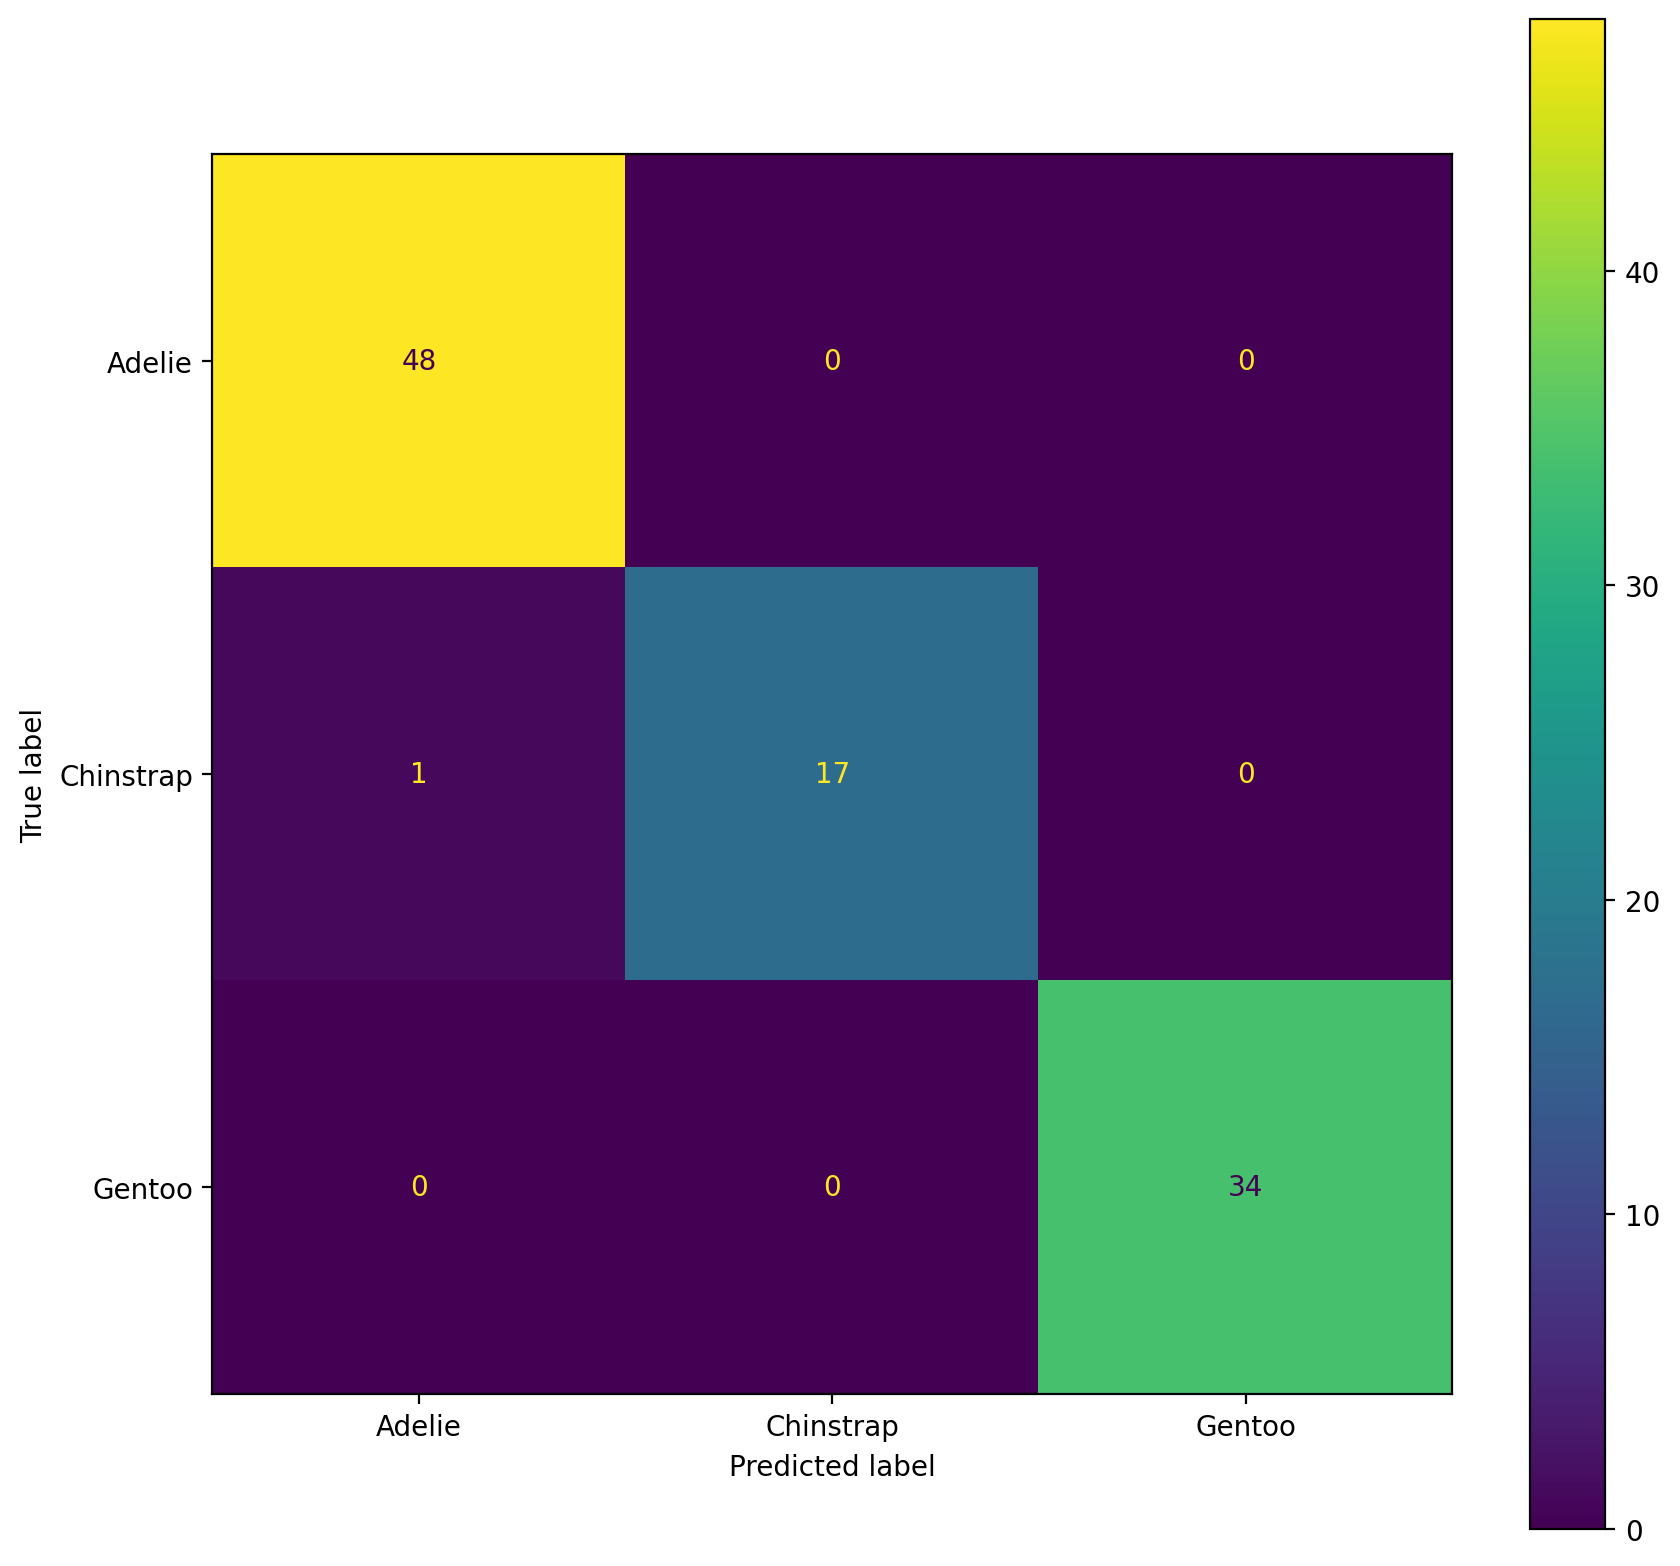

In [15]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_)
disp.plot()


In [16]:
rfc.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [17]:
cm

array([[48,  0,  0],
       [ 1, 17,  0],
       [ 0,  0, 34]], dtype=int64)

In [18]:
rfc.feature_importances_

array([0.34023391, 0.24603684, 0.18504193, 0.09655786, 0.10082588,
       0.02495999, 0.00634359])

In [19]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [20]:
feat_importance = pd.DataFrame({'feature': X.columns, 
                                'importance': rfc.feature_importances_})

feat_importance

feature  importance
0   culmen_length_mm    0.340234
1    culmen_depth_mm    0.246037
2  flipper_length_mm    0.185042
3        body_mass_g    0.096558
4       island_Dream    0.100826
5   island_Torgersen    0.024960
6           sex_MALE    0.006344

### Random Forest Regressor

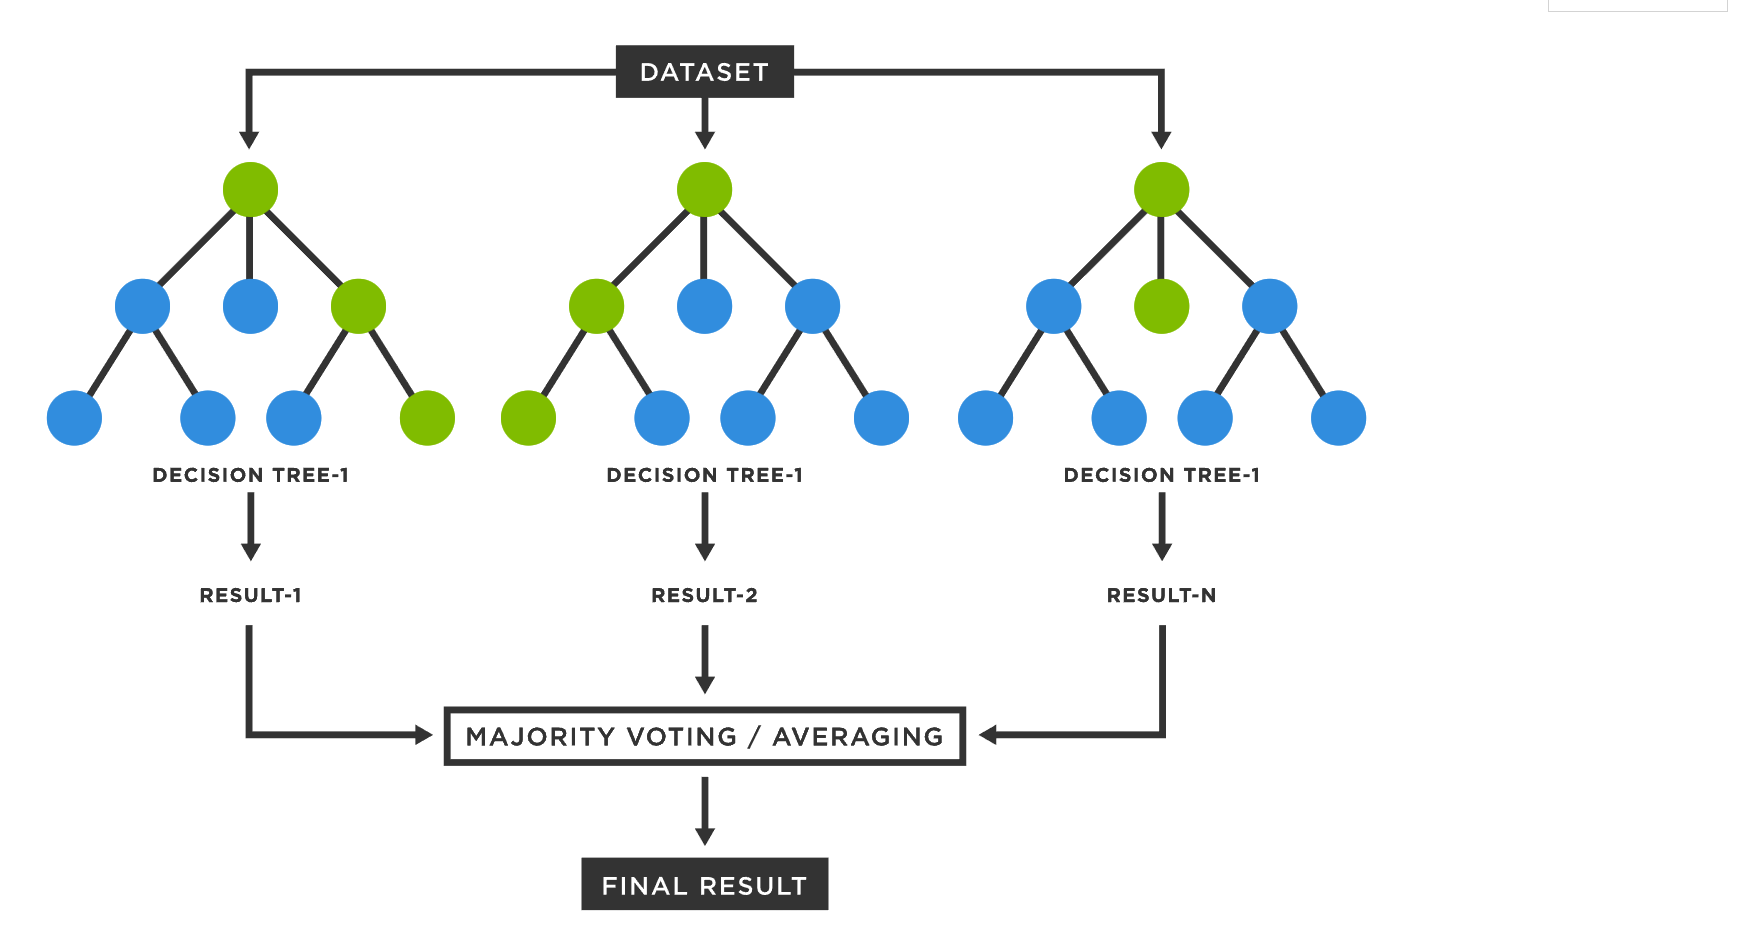

#### Diabetes Dataset
- https://www.kaggle.com/uciml/pima-indians-diabetes-database
- The Pima Indians Diabetes Database is a collection of medical records of Pima Indians living in Arizona, USA.
- The dataset contains 442 observations and 10 variables.
- The variables are:
  - age     age in years
  - sex
  - bmi     body mass index
  - bp      average blood pressure
  - s1      tc, T-Cells (a type of white blood cells)
  - s2      ldl, low-density lipoproteins
  - s3      hdl, high-density lipoproteins
  - s4      tch, thyroid stimulating hormone
  - s5      ltg, lamotrigine
  - s6      glu, blood sugar level

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
diabetes = datasets.load_diabetes()
diabetes.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [23]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [24]:
X = diabetes.data
y = diabetes.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
pd.DataFrame(X_train).describe()

0             1             2             3             4  \
count  3.090000e+02  3.090000e+02  3.090000e+02  3.090000e+02  3.090000e+02   
mean  -4.455264e-17  6.826614e-17 -9.700978e-18  3.952250e-18  7.904500e-18   
std    1.001622e+00  1.001622e+00  1.001622e+00  1.001622e+00  1.001622e+00   
min   -2.343689e+00 -9.464172e-01 -1.919484e+00 -2.371471e+00 -2.302838e+00   
25%   -7.722452e-01 -9.464172e-01 -7.063749e-01 -7.910587e-01 -7.249986e-01   
50%    9.204899e-02 -9.464172e-01 -1.672151e-01 -1.445263e-01 -9.386266e-02   
75%    7.991988e-01  1.056616e+00  6.639895e-01  7.175169e-01  5.659612e-01   
max    2.370643e+00  1.056616e+00  3.292393e+00  2.728951e+00  3.176569e+00   

                  5             6             7             8             9  
count  3.090000e+02  3.090000e+02  3.090000e+02  3.090000e+02  3.090000e+02  
mean  -9.000352e-17  1.192861e-16  3.488759e-16 -4.545088e-17  2.263112e-16  
std    1.001622e+00  1.001622e+00  1.001622e+00  1.001622e+00  1.001622e+00  
min   -2.437584e+00 -2.148059e+00 -1.607269e+00 -2.219173e+00 -2.938249e+00  
25%   -6.514856e-01 -6.712447e-01 -8.460790e-01 -6.821696e-01 -6.915664e-01  
50%   -8.883173e-02 -1.271554e-01 -8.488872e-02 -5.282551e-02 -2.796468e-04  
75%    5.915869e-01  5.723880e-01  6.763015e-01  6.626273e-01  6.045963e-01  
max    4.131072e+00  3.836924e+00  3.789570e+00  2.749354e+00  2.764868e+00

### Regression Model Building

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_predict = rfr.predict(X_test)

In [29]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_predict))

53.50946808918932

In [30]:
# r2_score
r2_score(y_test, y_predict)

0.4695998632379421

In [31]:
# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 100],
    'min_samples_leaf': [1, 5, 10]}

rfr = RandomForestRegressor()
grid = GridSearchCV(estimator=rfr, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [100, 200, 400]})

In [34]:
grid.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=10, n_estimators=400)

In [35]:
y_predict = grid.predict(X_test)

In [36]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_predict))

52.14676394518908

In [37]:
# r2_score
r2_score(y_test, y_predict)

0.4962708482175755

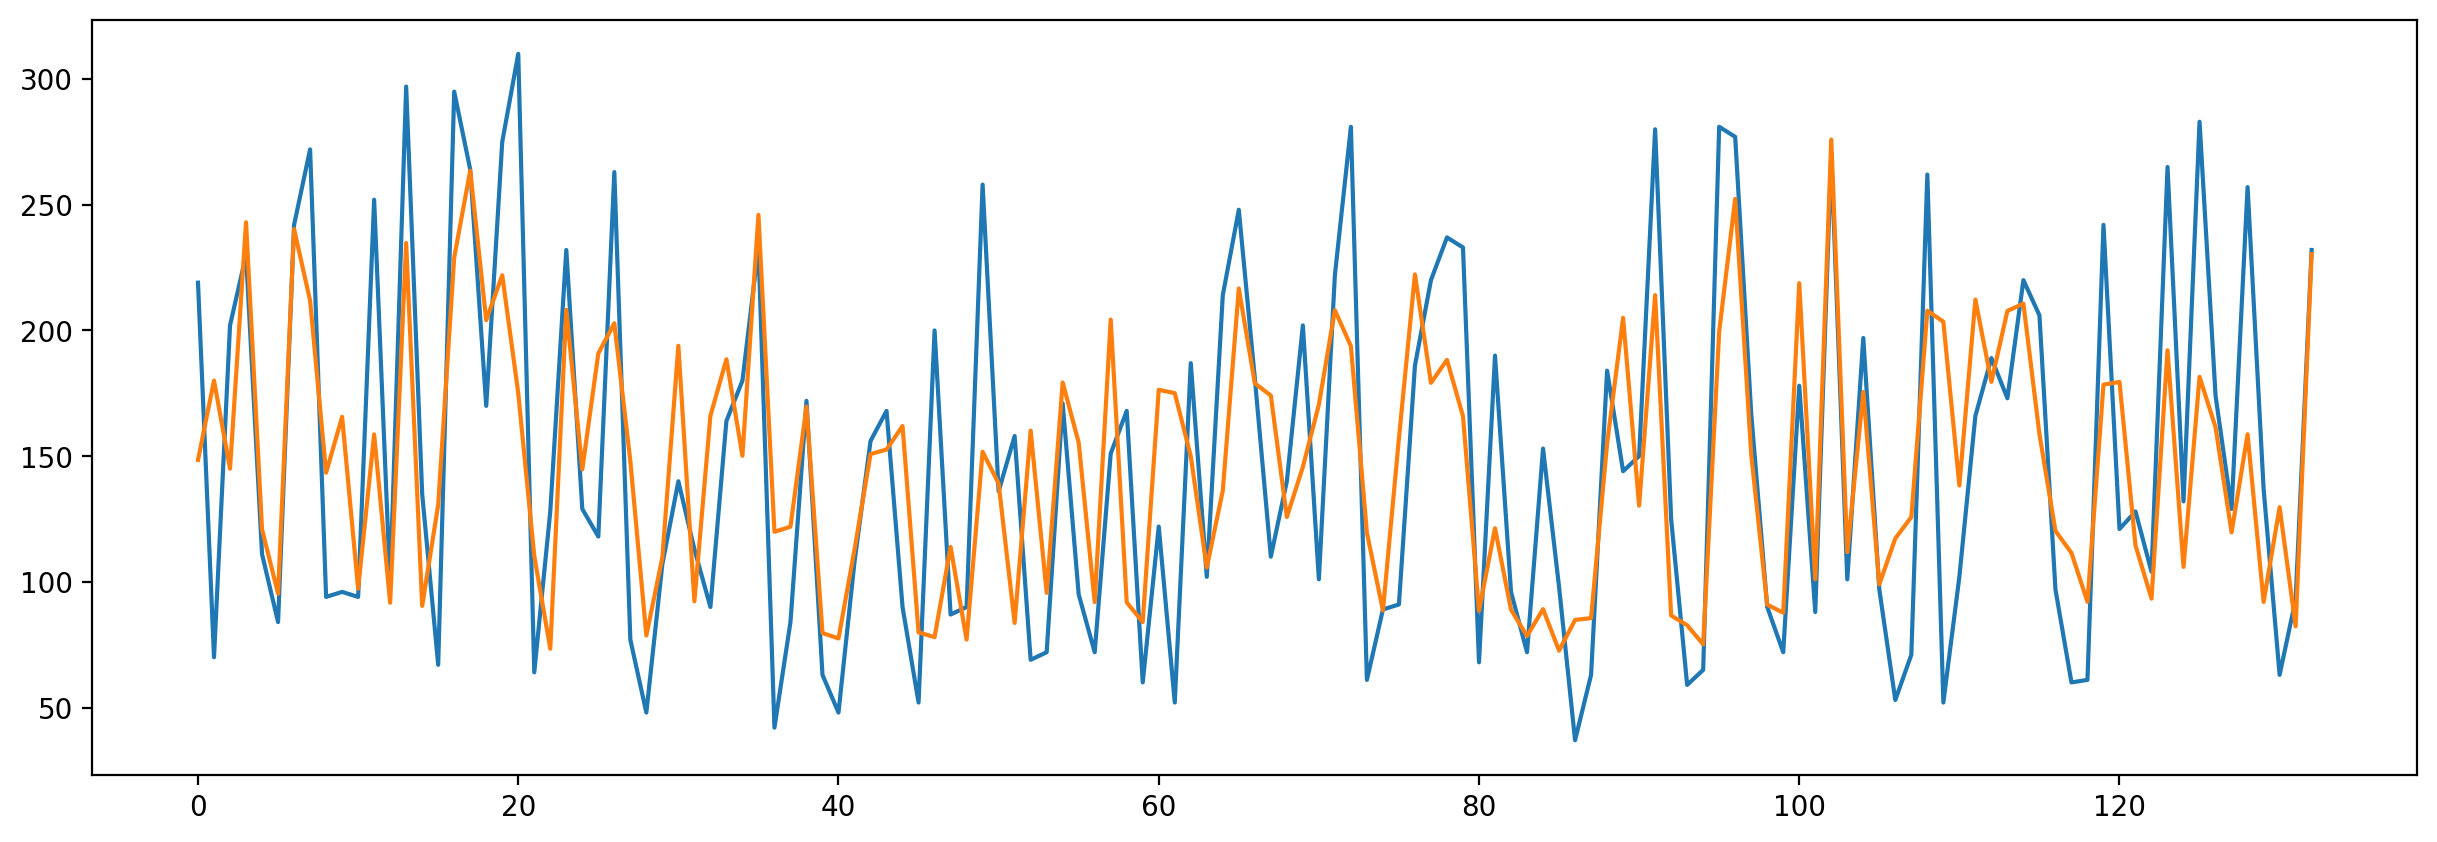

In [38]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(y_predict)

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
